In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
time=pd.read_csv('time.csv')
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [3]:
# time1=time[['date','test','confirmed']]
# time1['percent']=time1.apply(lambda x:x['confirmed']/x['test'])
percent=time['confirmed']/time['test']
percent=percent.to_frame()
time_percent= time.merge(percent, left_index=True, right_index=True)

In [4]:
time_percent.iloc[:,-1]

0      1.000000
1      1.000000
2      0.250000
3      0.045455
4      0.074074
         ...   
97     0.017931
98     0.017847
99     0.017669
100    0.017520
101    0.017366
Name: 0, Length: 102, dtype: float64

In [5]:
time_percent['date'] = pd.to_datetime(time_percent['date'])
time_percent=time_percent.set_index('date')

In [8]:
time_percent.iloc[:,:]

,time,test,negative,confirmed,released,deceased,0
date,,,,,,,
2020-01-20,16,1,0,1,0,0,1.000000
2020-01-21,16,1,0,1,0,0,1.000000
2020-01-22,16,4,3,1,0,0,0.250000
2020-01-23,16,22,21,1,0,0,0.045455
2020-01-24,16,27,25,2,0,0,0.074074
...,...,...,...,...,...,...,...
2020-04-26,0,598285,578558,10728,8717,242,0.017931
2020-04-27,0,601660,582027,10738,8764,243,0.017847
2020-04-28,0,608514,588559,10752,8854,244,0.017669


In [9]:
# time_percent.resample('W').sum()

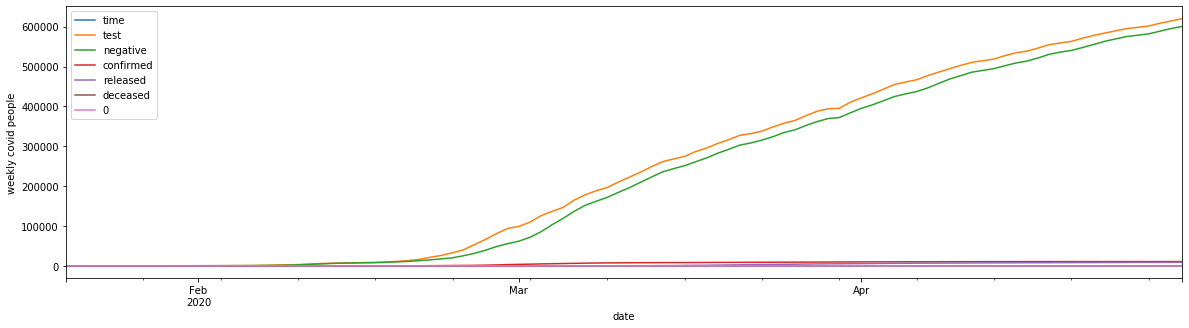

In [10]:
time_percent.resample('D').sum().plot(figsize=(20,5))
plt.ylabel('weekly covid people')
plt.show()

In [11]:
time_percent=time_percent.reset_index()

In [12]:
from sklearn.mixture import GaussianMixture
GM=GaussianMixture(n_components=5)
GM.fit(time_percent.iloc[:,1:])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

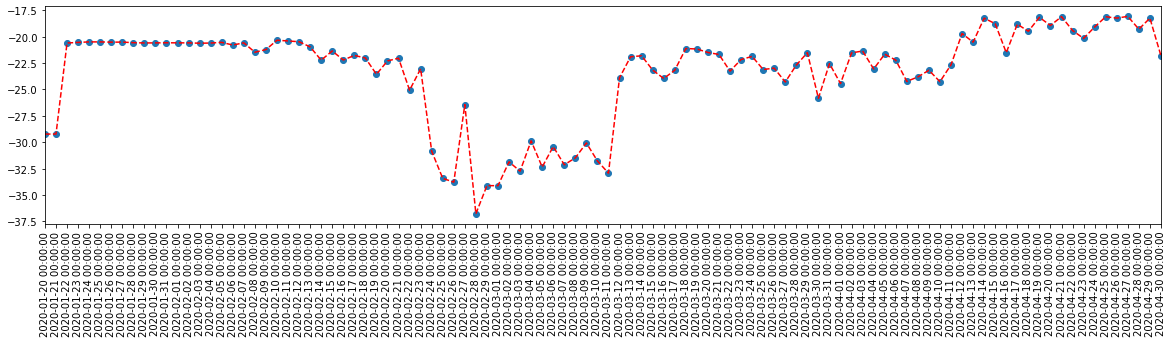

In [13]:
X=time_percent.iloc[:,1:]
plt.figure(figsize=(20,4))
plt.scatter(range(len(X)),GM.score_samples(X))
plt.xlim(0,100)
plt.xticks(range(len(X)),time_percent['date'][:102],rotation=90)
plt.plot(GM.score_samples(X),"r--")
plt.show()

In [14]:
time_percent1=time_percent.copy()

In [15]:
from sklearn.cluster import KMeans
KM=KMeans(n_clusters=5,random_state=999)
KM.fit(time_percent1.iloc[:,1:])
res=pd.DataFrame(KM.transform(time_percent1.iloc[:,1:]))
res=pd.concat((time_percent1['date'],res.min(1)),axis=1)
res.columns=["date","score"]
print (res.sort_values("score",ascending=False)[:5])
print
print (pd.Series(KM.predict(time_percent1.iloc[:,1:])).value_counts())

         date         score
41 2020-03-01  98833.513066
42 2020-03-02  97430.184559
40 2020-02-29  91506.354090
52 2020-03-12  88969.205871
81 2020-04-10  87619.695657
0    42
2    21
4    14
1    14
3    11
dtype: int64


In [18]:
policy=pd.read_csv('Policy.csv')
policy

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaN
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaN
7,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaN
8,9,Korea,Immigration,Special Immigration Procedure,from Italy,2020-03-12,NaN
9,10,Korea,Immigration,Special Immigration Procedure,from Iran,2020-03-12,NaN


Immigration    15
Education      11
Health          9
Technology      5
Alert           4
Social          4
Name: type, dtype: int64


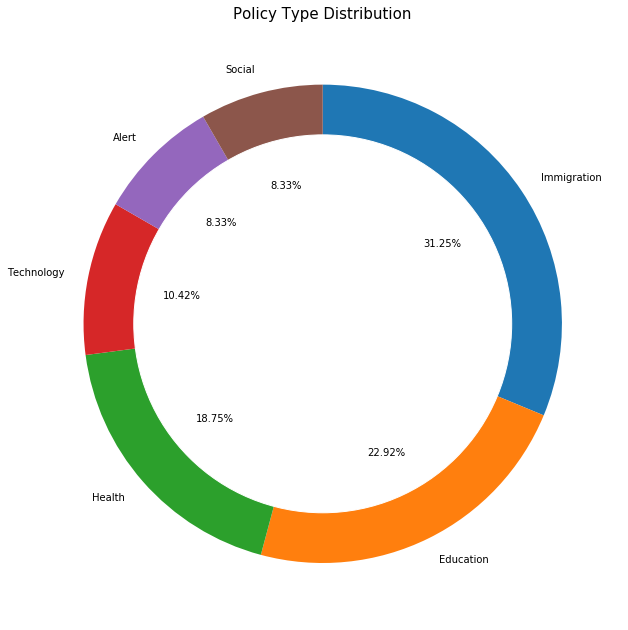

In [22]:
# Distribution Graph
print(policy.type.value_counts())

fig, ax = plt.subplots(figsize=(11, 11))
plt.title('Policy Type Distribution', fontsize=15)
pop_circle = plt.Circle((0,0), 0.79, color='white')
plt.pie(policy.type.value_counts()
        , labels = policy.type.value_counts().index
        , autopct = '%.2f%%'
        , startangle = 90
        , counterclock = False)
p=plt.gcf()
p.gca().add_artist(pop_circle)
plt.show()

Special Immigration Procedure                    13
School Opening with Online Class                  6
Emergency Use Authorization of Diagnostic Kit     5
School Opening Delay                              4
Infectious Disease Alert Level                    4
Social Distancing Campaign                        3
Mask Distribution                                 2
Drive-Through Screening Center                    2
Mandatory 14-day Self-Quarantine                  1
Electronic Wristbands                             1
Thanks to Challenge korea                         1
Open API                                          1
School Closure                                    1
Open Data                                         1
Mandatory Self-Quarantine & Diagonostic Tests     1
Self-Diagnosis App                                1
Self-Quarantine Safety Protection App             1
Name: gov_policy, dtype: int64


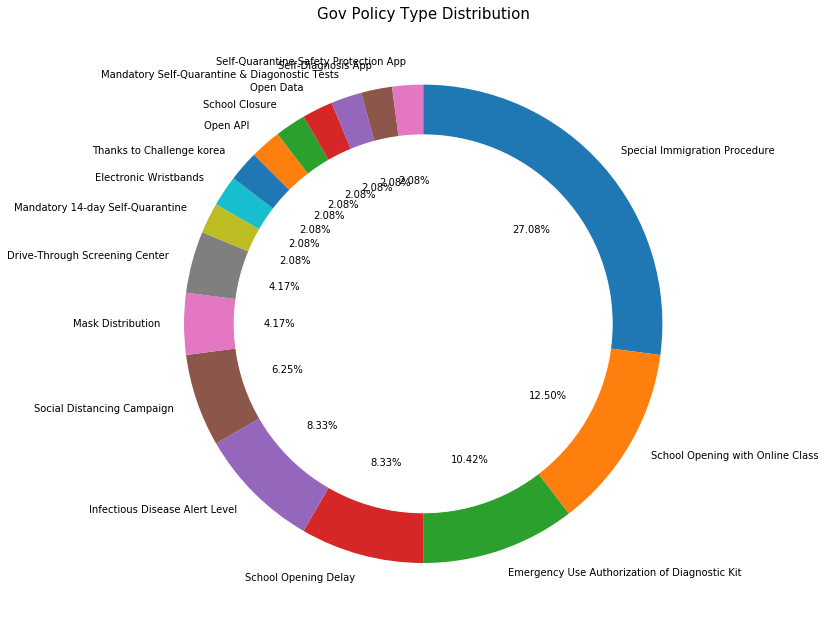

In [23]:
# Distribution Graph
print(policy.gov_policy.value_counts())

fig, ax = plt.subplots(figsize=(11, 11))
plt.title('Gov Policy Type Distribution', fontsize=15)
pop_circle = plt.Circle((0,0), 0.79, color='white')
plt.pie(policy.gov_policy.value_counts()
        , labels = policy.gov_policy.value_counts().index
        , autopct = '%.2f%%'
        , startangle = 90
        , counterclock = False)
p=plt.gcf()
p.gca().add_artist(pop_circle)
plt.show()

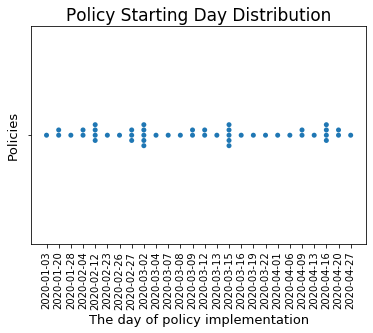

In [29]:
plt.title('Policy Starting Day Distribution', size=17)
sns.swarmplot(policy.start_date)
plt.xticks(rotation=90, size=10)
plt.xlabel('The day of policy implementation', size=13)
plt.ylabel('Policies', size=13)
plt.show()

In [33]:
print('[Columns for daily new cases added]')
for col in time.columns[2:7]:
    if col in [2, 4]:
        new_dict = {0: 1}
    else:
        new_dict = {0: 0}
    new_dict.update({ i : time[col][i] - time[col][i-1] for i in range(1, len(time)) })
    time['new_{}'.format(col)] = new_dict.values()
time.head(1).append(time.tail(1)).T

[Columns for daily new cases added]


,0,101
date,2020-01-20,2020-04-30
time,16,0
test,1,619881
negative,0,600482
confirmed,1,10765
released,0,9059
deceased,0,247
new_test,0,5684
new_negative,0,5353
new_confirmed,0,4


In [35]:
time['new_confirmed']

0       0
1       0
2       0
3       0
4       1
       ..
97     10
98     10
99     14
100     9
101     4
Name: new_confirmed, Length: 102, dtype: int64

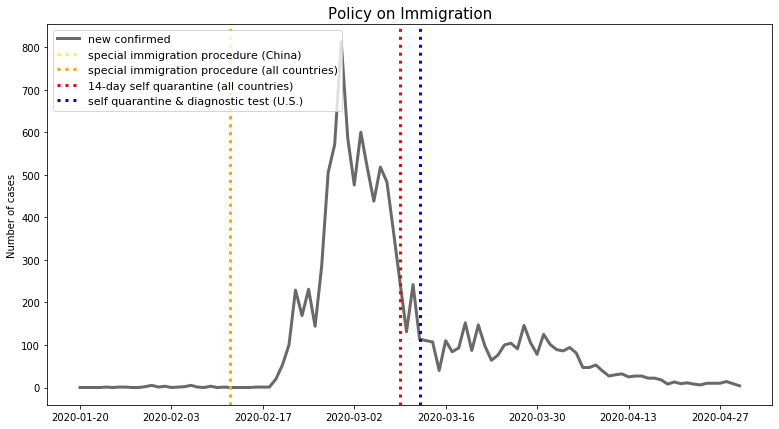

In [54]:
policy_immi = policy[ policy.type == 'Immigration']

fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Policy on Immigration', size=15)
plt.plot(time.date.unique(), time.new_confirmed
         , color='dimgray'
         , lw=3)
ax.set_xticks(ax.get_xticks()[::14])
for day, color in zip(policy_imm.start_date.values[1:], ['yellow', 'orange', 'red','blue']):
    ax.axvline(day, ls=':', color=color, lw=3)
ax.legend(['new confirmed'
           , 'special immigration procedure (China)'
           , 'special immigration procedure (all countries)'
           , '14-day self quarantine (all countries)'
           , 'self quarantine & diagnostic test (U.S.)'], fontsize=11
           , loc='upper left')
plt.ylabel('Number of cases')
plt.show()

In [42]:
policy_imm.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaN
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaN
7,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaN
8,9,Korea,Immigration,Special Immigration Procedure,from Italy,2020-03-12,NaN


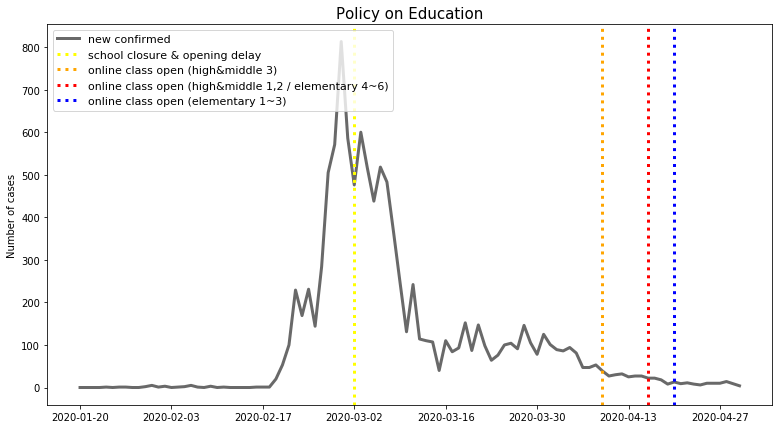

In [53]:
policy_edu = policy[ policy.type == 'Education' ]

fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Policy on Education', size=15)
plt.plot(time.date.unique(), time.new_confirmed
         , color='dimgray'
         , lw=3)
ax.set_xticks(ax.get_xticks()[::14])
for day, color in zip(policy[ policy.type == 'Education' ].start_date.unique(),['yellow', 'orange', 'red','blue']):
    ax.axvline(day, ls=':', color=color, lw=3)
ax.legend(['new confirmed', 'school closure & opening delay'
           , 'online class open (high&middle 3)'
           , 'online class open (high&middle 1,2 / elementary 4~6)'
           , 'online class open (elementary 1~3)'], fontsize=11
           , loc='upper left')
plt.ylabel('Number of cases')
plt.show()